## 1. Read File

In [43]:
import pandas as pd

df = pd.read_csv('data.csv', sep=';')
df.dropna(axis=0, how='any', inplace=True)                         # dropped NAs including rows with NULL sentiment
df.drop(['id', 'created_at'], axis=1, inplace=True)                # dropped irrelavent cols

In [44]:
df.describe()

,text,sentiment
count,1300,1300
unique,1284,3
top,"RT @ChrisDungeon: ""Innovation has nothing to d...",positive
freq,2,528


## 2. Preprocessing

In [45]:
# preprocessing methods used include
# 1) lower case
# 2) removing URLs
# 3) removing punctuation
# 4) removing stopwords
# 5) lemmatization 
# 6) stemming - have some criticism however will test if accuracy improves

In [46]:
# preprocess texts before tokennizing
import re 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')


def cleanse_series(series):
    series = series.str.lower()                                                    # to lower case
    series = series.map(lambda x: re.sub(r'http\S+', '', x))                       # remove URLs
    series = series.map(lambda x: re.sub(r'[^\w\s]', '', x))                       # remove punctuation

    return series


df['text'] = cleanse_series(df['text'])

df['text'] = df['text'].map(lambda x: x.split())
df['text'] = df['text'].map(lambda x: [lemmatizer.lemmatize(word) for word in x])      # lemmatize
df['text'] = df['text'].map(lambda x: [word for word in x if word not in stop_words])  # remove stopwords 

df

,text,sentiment
0,"[rt, robertbeadles, yo, enter, win, 1000, mona...",positive
1,"[srilanka, surcharge, fuel, removed, surcharge...",negative
2,"[net, issuance, increase, fund, fiscal, progra...",positive
3,"[rt, bentboolean, much, amazon, traffic, serve...",positive
4,"[amd, ryzen, 4000, desktop, cpu, looking, grea...",positive
...,...,...
1295,"[stock, back, recovery, room, fair, value, 57,...",positive
1296,"[rt, macrocharts, breadth, expanding, last, we...",positive
1297,"[rt, mawsonresource, rompasrajapalot, big, new...",neutral
1298,"[aapl, qqq, top, may]",positive


In [47]:
# tokenize - word count
from collections import Counter
import nltk


all_text = ' '.join(df['text'].map(lambda x: ' '.join(x)))

words = all_text.split()

word_count = Counter(words)
words_sorted = word_count.most_common(len(words))
word_count = {w: i +1  for i, (w,c) in enumerate(words_sorted)}

word_count

In [49]:
# tokenize - encode words

df['text'] = df['text'].map(lambda x: [word_count[word] for word in x if word in word_count])
df

,text,sentiment
0,"[2, 2255, 1019, 1367, 366, 405, 2256, 1368, 29...",positive
1,"[2258, 1369, 1370, 1021, 1369, 2259, 2260, 226...",negative
2,"[476, 2272, 294, 408, 817, 2273, 268, 477, 478...",positive
3,"[2, 2279, 189, 110, 1371, 2280, 2281, 295, 29,...",positive
4,"[137, 2283, 1372, 2284, 2285, 190, 138, 818, 1...",positive
...,...,...
1295,"[1, 70, 413, 1981, 927, 360, 1190, 6346, 1126,...",positive
1296,"[2, 1353, 2208, 2024, 64, 27, 2248, 928, 3, 1,...",positive
1297,"[2, 6348, 6349, 75, 28, 1480, 6350, 215, 6351,...",neutral
1298,"[4, 16, 89, 81]",positive


In [50]:
# tokenize - encode labels
sent_dict = {'positive':1, 'neutral':0, 'negative': -1}
df['sentiment'] = df['sentiment'].map(lambda x: sent_dict[x])
df

,text,sentiment
0,"[2, 2255, 1019, 1367, 366, 405, 2256, 1368, 29...",1
1,"[2258, 1369, 1370, 1021, 1369, 2259, 2260, 226...",-1
2,"[476, 2272, 294, 408, 817, 2273, 268, 477, 478...",1
3,"[2, 2279, 189, 110, 1371, 2280, 2281, 295, 29,...",1
4,"[137, 2283, 1372, 2284, 2285, 190, 138, 818, 1...",1
...,...,...
1295,"[1, 70, 413, 1981, 927, 360, 1190, 6346, 1126,...",1
1296,"[2, 1353, 2208, 2024, 64, 27, 2248, 928, 3, 1,...",1
1297,"[2, 6348, 6349, 75, 28, 1480, 6350, 215, 6351,...",0
1298,"[4, 16, 89, 81]",1


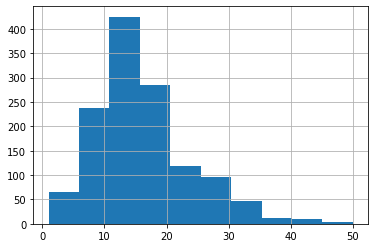

In [51]:
# distribution of text lengths
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df['length'] = df['text'].str.len()
df['length'].hist()
plt.show()


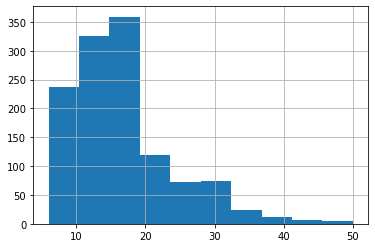

,text,sentiment,length
0,"[2, 2255, 1019, 1367, 366, 405, 2256, 1368, 29...",1,18
1,"[2258, 1369, 1370, 1021, 1369, 2259, 2260, 226...",-1,29
2,"[476, 2272, 294, 408, 817, 2273, 268, 477, 478...",1,30
3,"[2, 2279, 189, 110, 1371, 2280, 2281, 295, 29,...",1,14
4,"[137, 2283, 1372, 2284, 2285, 190, 138, 818, 1...",1,14
...,...,...,...
1294,"[241, 620, 239, 122, 337, 1132, 703]",0,7
1295,"[1, 70, 413, 1981, 927, 360, 1190, 6346, 1126,...",1,13
1296,"[2, 1353, 2208, 2024, 64, 27, 2248, 928, 3, 1,...",1,13
1297,"[2, 6348, 6349, 75, 28, 1480, 6350, 215, 6351,...",0,19


In [52]:
# new distribution after dropping outliers (tweet length > 50 or < 5)
max_len = 50
min_len = 6
df = df[(df['length'] <= max_len) & (df['length'] >= min_len)]
df['length'].hist()
plt.show()
df

In [53]:
# pad 0s to ensure same length
import more_itertools as mit
import numpy as np

df['text'] = df['text'].map(lambda x: np.array(list(mit.padded(x, 0, max_len))))
df['length'] = df['text'].str.len()
df

########### to resolve: the warning (probably deepcopy) ##########

C:\Users\kevin\AppData\Local\Temp\ipykernel_8388\751274324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(lambda x: np.array(list(mit.padded(x, 0, max_len))))
C:\Users\kevin\AppData\Local\Temp\ipykernel_8388\751274324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['text'].str.len()


,text,sentiment,length
0,"[2, 2255, 1019, 1367, 366, 405, 2256, 1368, 29...",1,50
1,"[2258, 1369, 1370, 1021, 1369, 2259, 2260, 226...",-1,50
2,"[476, 2272, 294, 408, 817, 2273, 268, 477, 478...",1,50
3,"[2, 2279, 189, 110, 1371, 2280, 2281, 295, 29,...",1,50
4,"[137, 2283, 1372, 2284, 2285, 190, 138, 818, 1...",1,50
...,...,...,...
1294,"[241, 620, 239, 122, 337, 1132, 703, 0, 0, 0, ...",0,50
1295,"[1, 70, 413, 1981, 927, 360, 1190, 6346, 1126,...",1,50
1296,"[2, 1353, 2208, 2024, 64, 27, 2248, 928, 3, 1,...",1,50
1297,"[2, 6348, 6349, 75, 28, 1480, 6350, 215, 6351,...",0,50


## 3. Train Test Split & Data Loader

In [54]:
# train test split - 60% train, 20% valid, 20% test
from sklearn.model_selection import train_test_split
Y = df['sentiment']
X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)                # train test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)     # train valid split

X_train = np.stack(X_train.to_numpy())
X_test = np.stack(X_test.to_numpy())
X_val = np.stack(X_val.to_numpy())
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()


In [55]:
# numpy to dataloader
import torch
from torch.utils.data import DataLoader, TensorDataset

# numpy to TensorDateset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

batch_size = 50
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)


## 4. Model Creation

In [56]:
# define model 

import torch.nn as nn

class LSTM_Classifier(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, n_layers, n_words, output_size, drop_prob=0.5):

        super().__init__()
        self.embedding = nn.Embedding(n_words, embedding_dim)
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.output_size = output_size
        self.dropout = nn.Dropout(drop_prob)
        self.full_connected = nn.Linear(hidden_dim, output_size)


    def forward(self, sentence, hidden):
        
        embeds = self.embedding(sentence)
        batch_size = sentence.size(0)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        output = self.dropout(lstm_out)
        output = nn.Sigmoid(self.full_connected(out))
        output = output.view(batch_size, -1)
        output = output[:, -1]
        
        return output, hidden
    
    
    def init_hidden(self, batch_size):

        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
                 )
        
        return hidden
        

In [57]:
# Instantiate model
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
model = LSTM_Classifier(1 + len(word_count), output_size, embedding_dim, hidden_dim, n_layers)

model

LSTM_Classifier(
  (embedding): Embedding(256, 6360)
  (lstm): LSTM(6360, 1, num_layers=400, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (full_connected): Linear(in_features=1, out_features=2, bias=True)
)

In [58]:
# add new word to dict
import numpy as np

# convert sentence to integers
def prepare_sequence(seq, word_count):
    for w in seq:
        if w not in word_count:
            word_count[w] = 1
    ints = [word_count[w] for w in seq]
    ints = np.array(ints)
    
    return torch.from_numpy(ints)
